In [ ]:
from google.colab import drive
import os
import json

drive.mount('/content/drive')

# Load images
image_folder = "/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 2/images"
print("Extracting the image files...")
all_files = os.listdir(image_folder)

print(f"Checking the number of images: {len(all_files)}")

# Load annotation file
annotation_file_path = "/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 2/annotations.json"

# Load the annotation file
with open(annotation_file_path, 'r') as file:
    annotations = json.load(file)

print("Done!")

Mounted at /content/drive
Extracting the image files...
Checking the number of images: 32823
Done!


In [ ]:
!pip install tqdm
!pip install -U -q matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.8 MB/s eta 0:00:00


In [ ]:
from tqdm import tqdm
import re

print("Checking for duplicate pictures by their names:") # Given the matching number of images, this part can be skipped.

# Function to check for duplicate image names (those with suffix (x) where x is any number)
def check_for_duplicate_images(all_files):
    duplicates = []  # List to store duplicates (those that end with (x))

    # Regex pattern to detect filenames that end with (x) where x is any number
    pattern = re.compile(r"\(\d+\)$")

    # Iterate through all files and check if the filename ends with (x) using the regex pattern
    for file in tqdm(all_files, desc="Checking for duplicates", unit="file"):
        if pattern.search(file):  # Check if filename matches the pattern (ending with (x))
            duplicates.append(file)

    return duplicates

# Check for duplicate images by name (those ending with (x) where x can be any number)
# Duplicates might occur when uploading huge number of files into Google Drive
duplicates = check_for_duplicate_images(all_files)

# Print out the duplicates
if duplicates:
    print("\nDuplicate images found (files ending with (x)):")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("\nNo duplicates found by name (no files ending with (x)).")

Checking for duplicate pictures by their names:


Checking for duplicates: 100%|██████████| 32823/32823 [00:00<00:00, 3968339.68file/s]


No duplicates found by name (no files ending with (x)).


In [ ]:
# Extract categories for reference (if needed for class labels)
categories = annotations.get("categories", [])

# Extract image annotations (bounding boxes, image names, etc.)
image_annotations = annotations.get("annotations", [])

# Initialize a list to store the processed data. We access them with their indices.
annotated_data = []

# Interate through the annotations
for annotation in tqdm(image_annotations, desc="Processing Annotations", unit="image"):
    image_name = annotation["image_name"]
    bboxes = annotation["bbox"]

    # Initialize an empty list to store bounding boxes for the current image (indexed by `index`)
    annotated_data.append({
        'image_name': image_name,  # Optionally store the image name if needed
        'bboxes': []
    })

    # Iterate through each bounding box and store the relevant information
    for bbox in bboxes:
        top, left, height, width, class_id = bbox["top"], bbox["left"], bbox["height"], bbox["width"], bbox["class"]

        # Store the processed bounding box information along with the class name
        class_name = categories[class_id] if class_id < len(categories) else 'Unknown'

        # Append the bounding box and class information for the current image
        annotated_data[-1]['bboxes'].append({
            'bbox': {'top': top, 'left': left, 'height': height, 'width': width},
            'class': class_name
        })

print(f"\n\nCheck the number of images/samples: {len(annotated_data)}")

print("\nA sample from the dataset to see its format. Each sample is stored in a dictionary that contains names and bboxes")
print(annotated_data[0])

Processing Annotations: 100%|██████████| 32823/32823 [00:00<00:00, 74556.79image/s]



Check the number of images/samples: 32823

A sample from the dataset to see its format. Each sample is stored in a dictionary that contains names and bboxes
{'image_name': 'frame_20190829091111_x_0001973.jpg', 'bboxes': [{'bbox': {'top': 163, 'left': 1098, 'height': 185, 'width': 420}, 'class': 'Car'}, {'bbox': {'top': 421, 'left': 1128, 'height': 176, 'width': 393}, 'class': 'Car'}, {'bbox': {'top': 927, 'left': 1703, 'height': 153, 'width': 183}, 'class': 'Human'}]}


Printing 5 random pictures with their annotations:


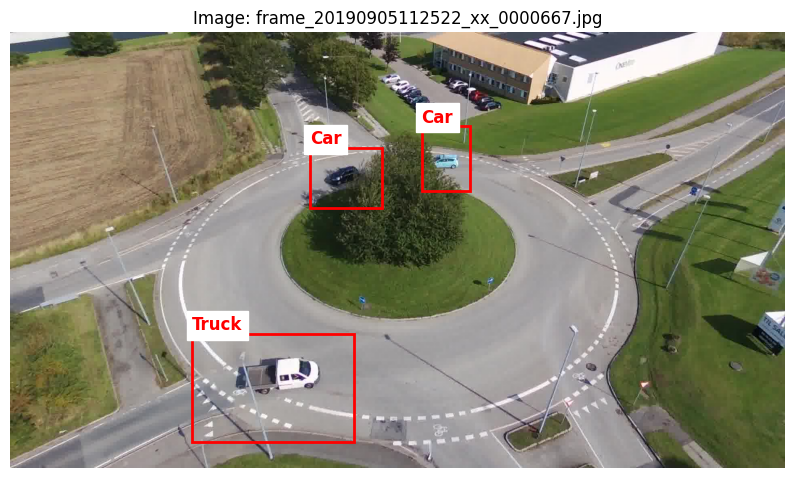

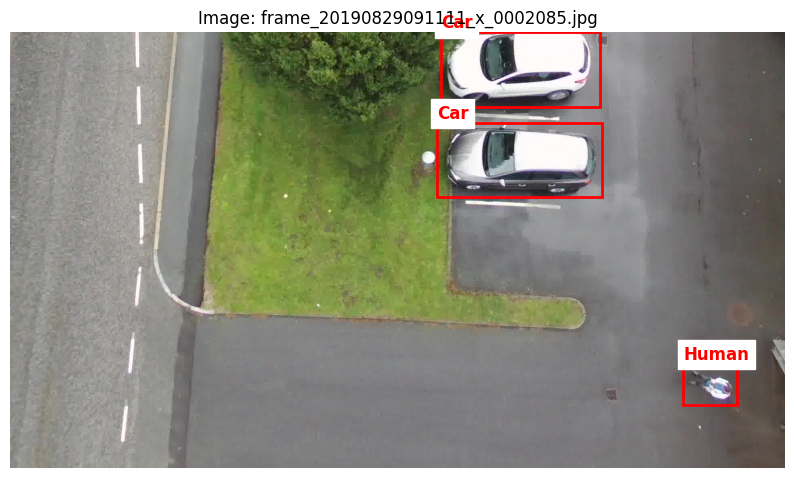

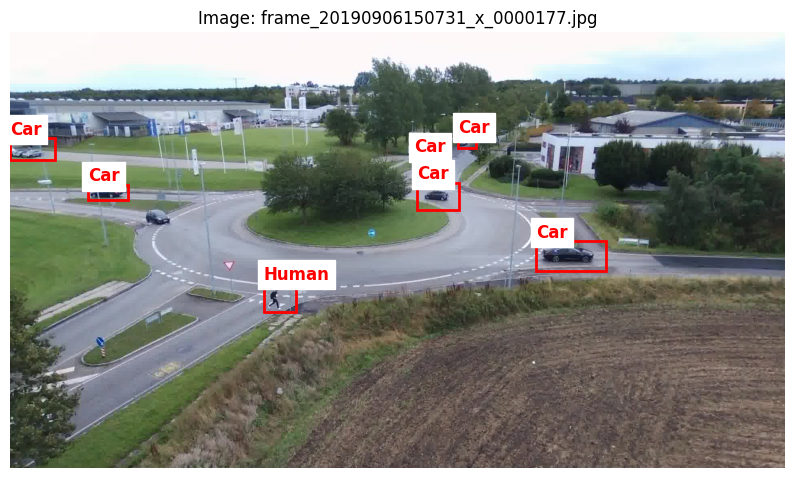

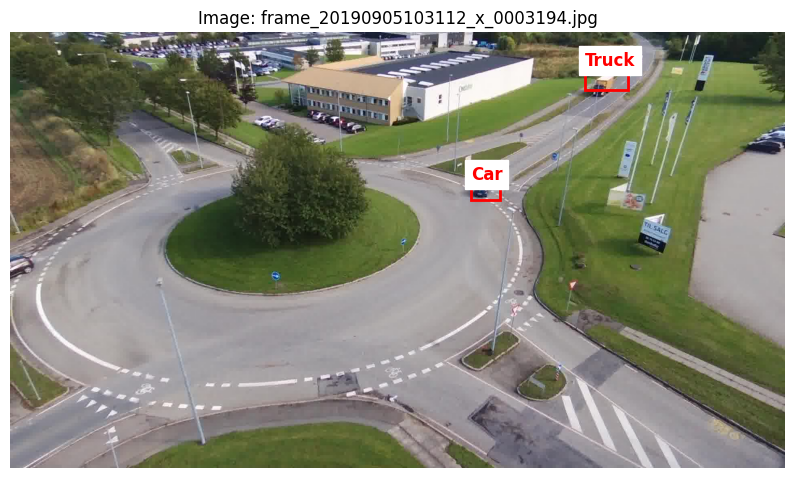

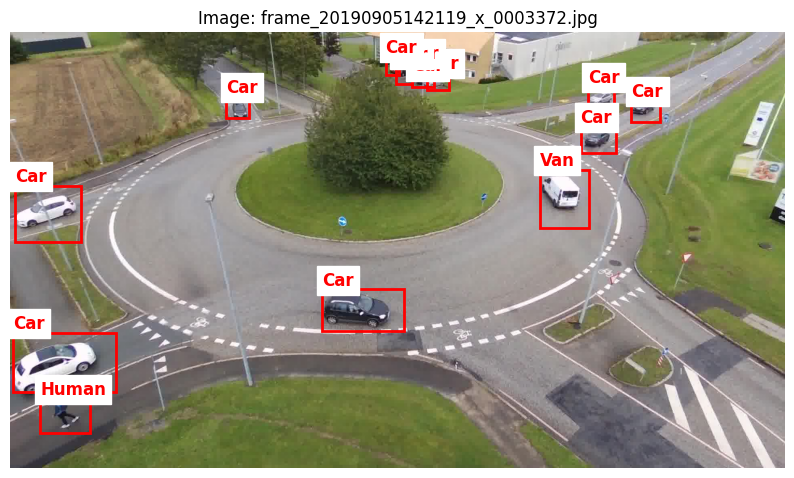

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import random

# Define a function to visualize an image given its index and the dataset
def print_image_with_boxes1(index, annotated_data):
    "Print the image with boxes given its index and annotated data."

    # Get the image name and bounding box annotations for the selected index
    image_name = annotated_data[index]['image_name']
    bboxes = annotated_data[index]['bboxes']

    # Load the image
    image_path = f"/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 2/images/{image_name}"
    img = mpimg.imread(image_path)

    # Create a plot to display the image
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    # Iterate through each bounding box and draw it on the image
    for bbox in bboxes:
        top, left, height, width = bbox['bbox']['top'], bbox['bbox']['left'], bbox['bbox']['height'], bbox['bbox']['width']
        class_name = bbox['class']

        # Create a Rectangle patch for the bounding box
        rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Add the class label above the bounding box
        ax.text(left, top - 10, class_name, color='red', fontsize=12, weight='bold', backgroundcolor='white')

    # Hide the axes and display the image
    ax.axis('off')
    plt.title(f"Image: {image_name}")
    plt.show()

# Define a function to visualize the image given the sample data
def print_image_with_boxes2(sample):
    "Print the image with boxes given its index and annotated data."

    # Get the image name and bounding box annotations for the selected index
    image_name = sample['image_name']
    bboxes = sample['bboxes']

    # Load the image
    image_path = f"/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 2/images/{image_name}"
    img = mpimg.imread(image_path)

    # Create a plot to display the image
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img)

    # Iterate through each bounding box and draw it on the image
    for bbox in bboxes:
        top, left, height, width = bbox['bbox']['top'], bbox['bbox']['left'], bbox['bbox']['height'], bbox['bbox']['width']
        class_name = bbox['class']

        # Create a Rectangle patch for the bounding box
        rect = patches.Rectangle((left, top), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

        # Add the class label above the bounding box
        ax.text(left, top - 10, class_name, color='red', fontsize=12, weight='bold', backgroundcolor='white')

    # Hide the axes and display the image
    ax.axis('off')
    plt.title(f"Image: {image_name}")
    plt.show()


# Define a function to print some random samples given the number of images.
def print_random_images(num_times, annotated_data):
    # Get the total number of images in annotated_data
    num_images = len(annotated_data)

    # Ensure the number of times is not greater than the available images
    if num_times > num_images:
        print(f"Number of times to display is greater than the number of available images. Displaying {num_images} times.")
        num_times = num_images

    for _ in range(num_times):
        # Select a random index
        random_index = random.randint(0, num_images - 1)

        # Print the randomly selected image with bounding boxes
        print_image_with_boxes1(random_index, annotated_data)
        print("\n")

num_times = 5
print(f"Printing {num_times} random pictures with their annotations:")
print_random_images(num_times, annotated_data)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

def visualize_and_filter_bboxes(sample):
    """
    Visualizes the invalid bounding boxes and returns a filtered sample with only valid boxes.
    """
    # List to store invalid bounding boxes' details
    invalid_bboxes = []
    valid_bboxes = []
    valid_categories = []

    # Iterate through the bounding boxes in the sample
    for i, bbox in enumerate(sample["bboxes"]):
        top, left, height, width = bbox['bbox']['top'], bbox['bbox']['left'], bbox['bbox']['height'], bbox['bbox']['width']

        # Check if the bounding box is invalid (x_min < x_max and y_min < y_max)
        if left >= left + width or top >= top + height:
            invalid_bboxes.append({
                'bbox': bbox,
                'index': i
            })
        else:
            valid_bboxes.append(bbox)
            valid_categories.append(bbox['class'])


    if invalid_bboxes != []:
        print("Original image:")
        print_image_with_boxes2(sample)
        sample["bboxes"] = valid_bboxes
        print("Cleaned image:")
        print_image_with_boxes2(sample)
        print()


    # Return the filtered sample with valid bounding boxes

    return sample, invalid_bboxes

def visualize_and_filter_all_bboxes(dataset):
    """
    Iterates over the entire dataset and visualizes and filters out the invalid bounding boxes for each sample.
    """
    filtered_dataset = []
    for sample in dataset:
        filtered_sample, invalid_bboxes = visualize_and_filter_bboxes(sample)
        # Only append samples with valid bounding boxes
        if filtered_sample and filtered_sample.get("bboxes"):  # Ensure the sample is not None and has valid bboxes
            filtered_dataset.append(filtered_sample)

    return filtered_dataset

filtered_data = visualize_and_filter_all_bboxes(annotated_data)

# Print the sizes of the filtered dataset
print(f"Filtered data size (with valid bounding boxes only): {len(filtered_data)}")


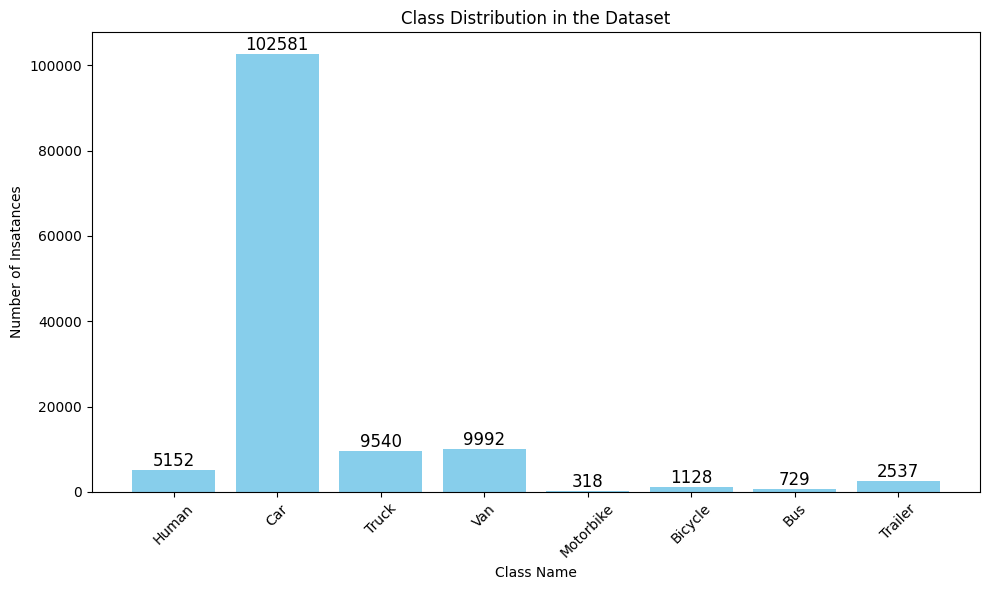

In [ ]:
import matplotlib.pyplot as plt

def visualize_class_distribution(annotated_data, categories):
    # Initialize a dictionary to store the class counts
    class_counts = {category: 0 for category in categories}

    # Iterate through the annotated data and count the occurrences of each class
    for sample in annotated_data:
        bboxes = sample['bboxes']
        for bbox in bboxes:
            class_name = bbox['class']
            class_counts[class_name] += 1

    # Prepare data for visualization
    class_names = list(class_counts.keys())
    counts = list(class_counts.values())

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(class_names, counts, color='skyblue')

    # Add the numbers on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1,  # Position of text
                 str(int(height)),  # Text to display
                 ha='center', va='bottom', fontsize=12)

    plt.xlabel('Class Name')
    plt.ylabel('Number of Insatances')
    plt.title('Class Distribution in the Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

visualize_class_distribution(annotated_data, categories)

In [ ]:
def split_annotations(annotations, train_ratio=0.6, val_ratio=0.1, test_ratio=0.3, seed=724):
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-6, "Ratios must sum to 1.0"

    random.seed(seed)
    shuffled = annotations.copy()
    random.shuffle(shuffled)

    n = len(shuffled)
    train_end = int(train_ratio * n)
    val_end = train_end + int(val_ratio * n)

    train_data = shuffled[:train_end]
    val_data   = shuffled[train_end:val_end]
    test_data  = shuffled[val_end:]

    return train_data, val_data, test_data


# Split the annotation
train_annotations, val_annotations, test_annotations = split_annotations(filtered_data)

def save_splits(train_annotations, val_annotations, test_annotations, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    splits = {
        "train": train_annotations,
        "val":   val_annotations,
        "test":  test_annotations,
    }
    for name, annotations in splits.items():
        path = os.path.join(save_dir, f"{name}_annotations.json")
        with open(path, "w") as f:
            json.dump(annotations, f, indent=2)
    print(f"Saved train/val/test annotation files to {save_dir}")

# Save the annotations
print("Saving the split annotations...")
save_splits(train_annotations,
            val_annotations,
            test_annotations,
            save_dir="/content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 2/splits")
print("Done!")

Saving the split annotations...
Saved train/val/test annotation files to /content/drive/MyDrive/DI725 - Transformers and Attention-based Deep Networks/Assignment 2/splits
Done!
